<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [26]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [28]:
data = pd.read_csv('./train.csv')

In [29]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [30]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [31]:
data.isna().mean()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

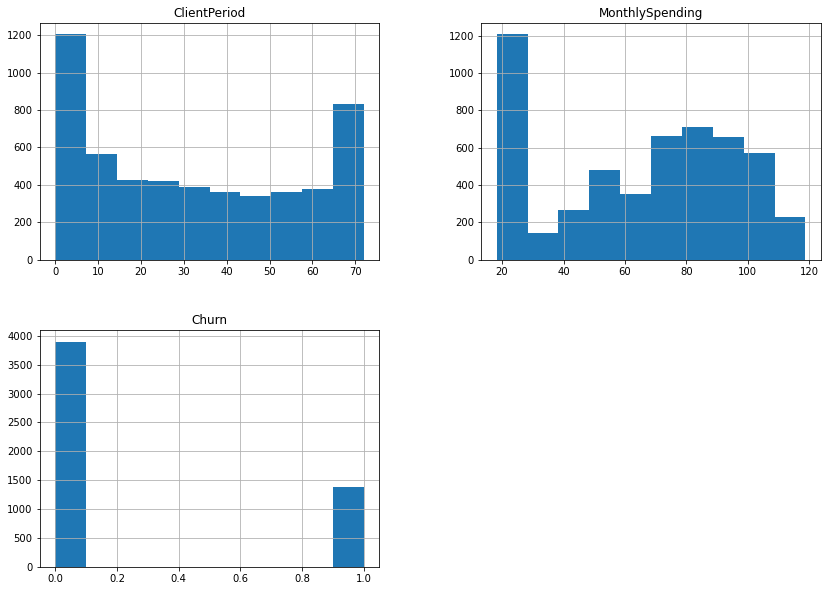

In [32]:
data.hist(column=(num_cols+[target_col]), figsize=(14, 10)) 
None

In [33]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts(dropna=False))
    print()

Sex DISTRIBUTION
Male      2655
Female    2627
Name: Sex, dtype: int64

IsSeniorCitizen DISTRIBUTION
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner DISTRIBUTION
No     2705
Yes    2577
Name: HasPartner, dtype: int64

HasChild DISTRIBUTION
No     3676
Yes    1606
Name: HasChild, dtype: int64

HasPhoneService DISTRIBUTION
Yes    4761
No      521
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers DISTRIBUTION
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService DISTRIBUTION
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

HasOnlineSecurityService DISTRIBUTION
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup DISTRIBUTION
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dty

По многим признакам всего 2 возможных значения: Yes, No или Male, Female. Такие признаки легко преобразовать в числовые, заменив значения на 0 и 1. А признак IsSeniorCitizen вообще можно было отнести к числовым. Всё это сделаем с помощью one-hot-encoding'а.

In [34]:
#подготовим данные для круговых диаграмм:
val = []
lab = []
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    x = str(data[col].value_counts(dropna=False)).split('\n')[:-1]
    y =  [val.split('  ') for val in x]
    labels = [val[0].strip() for val in y]
    values = [val[-1].strip() for val in y]
    val.append(values)
    lab.append(labels)
    print(labels,values,'\n')
print(lab,val)

Sex DISTRIBUTION
['Male', 'Female'] ['2655', '2627'] 

IsSeniorCitizen DISTRIBUTION
['0', '1'] ['4440', '842'] 

HasPartner DISTRIBUTION
['No', 'Yes'] ['2705', '2577'] 

HasChild DISTRIBUTION
['No', 'Yes'] ['3676', '1606'] 

HasPhoneService DISTRIBUTION
['Yes', 'No'] ['4761', '521'] 

HasMultiplePhoneNumbers DISTRIBUTION
['No', 'Yes', 'No phone service'] ['2511', '2250', '521'] 

HasInternetService DISTRIBUTION
['Fiber optic', 'DSL', 'No'] ['2341', '1800', '1141'] 

HasOnlineSecurityService DISTRIBUTION
['No', 'Yes', 'No internet service'] ['2612', '1529', '1141'] 

HasOnlineBackup DISTRIBUTION
['No', 'Yes', 'No internet service'] ['2332', '1809', '1141'] 

HasDeviceProtection DISTRIBUTION
['No', 'Yes', 'No internet service'] ['2317', '1824', '1141'] 

HasTechSupportAccess DISTRIBUTION
['No', 'Yes', 'No internet service'] ['2604', '1537', '1141'] 

HasOnlineTV DISTRIBUTION
['No', 'Yes', 'No internet service'] ['2099', '2042', '1141'] 

HasMovieSubscription DISTRIBUTION
['No', 'Yes', 'N

Рисуем диаграммы для категориальных признаков

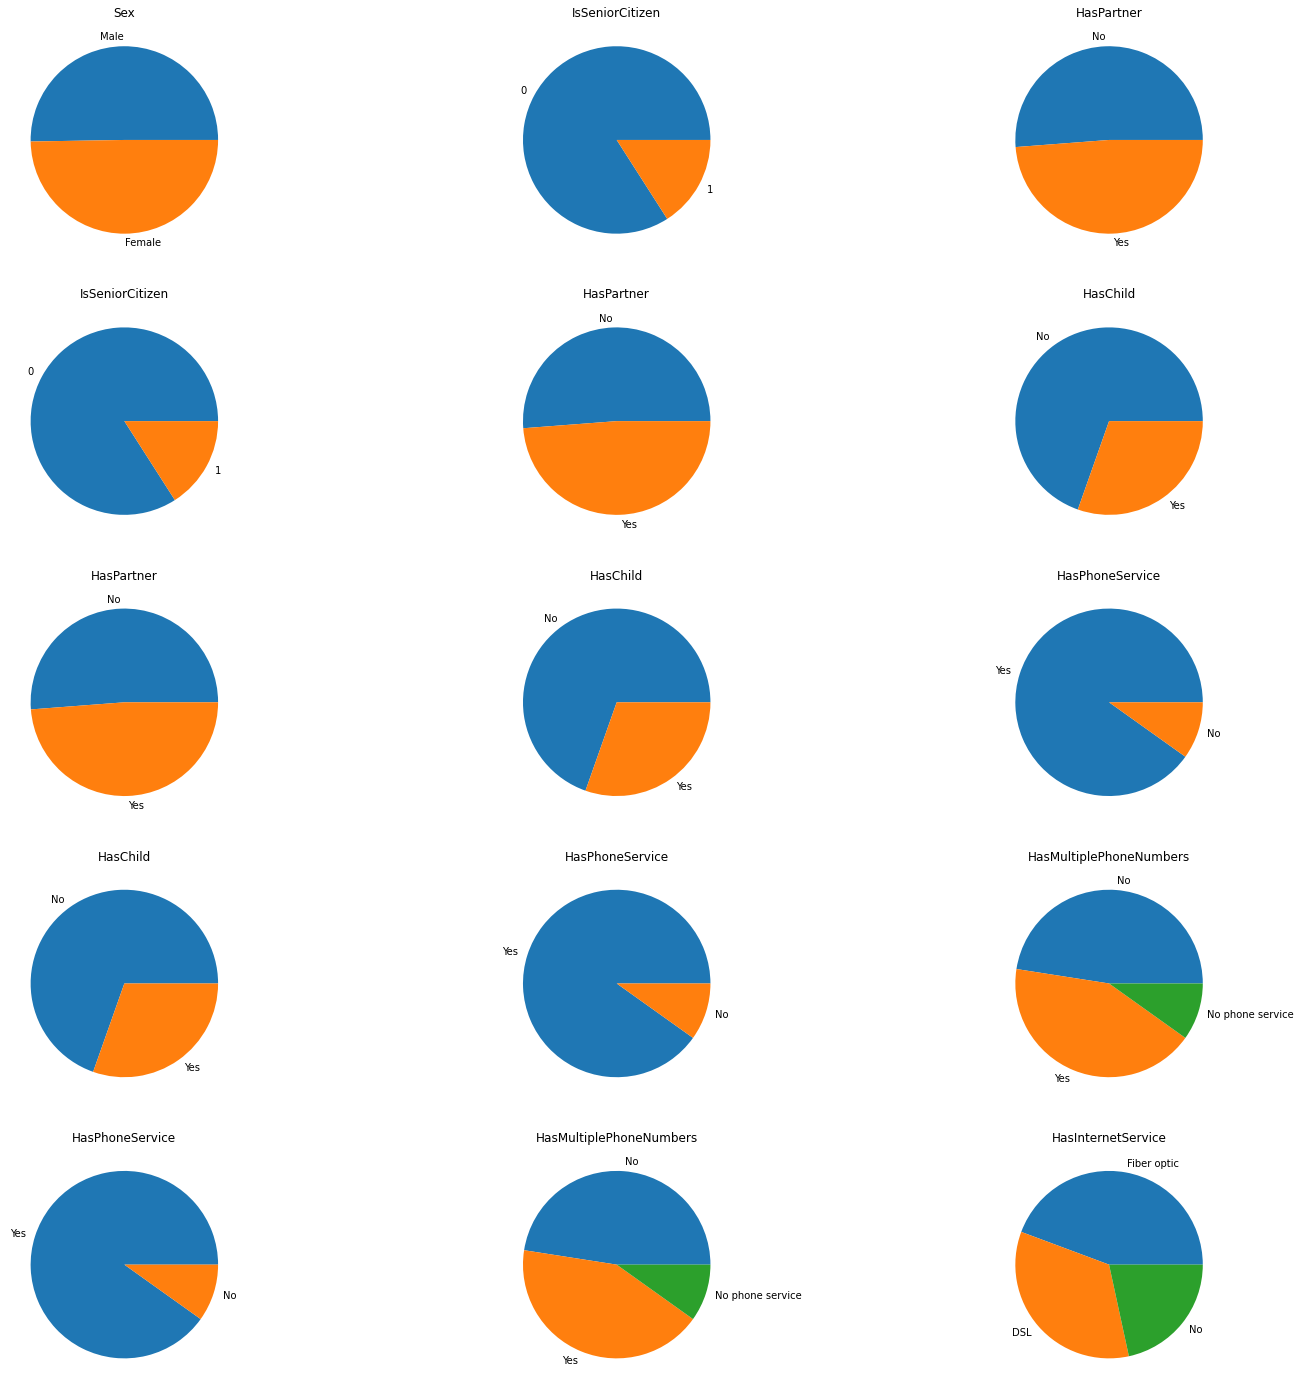

In [35]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows = 5, ncols = 3,figsize=(25, 25))
k = 0
for i in range(5):
  for k in range(3):
    ax[i,k].set_title(cat_cols[i+k])
    ax[i,k].pie(val[i+k], labels=lab[i+k])
 

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [36]:
print(data.shape)

data = data.replace(' ', np.nan) #меняем пробелы на None

data = data.dropna() #удаляем все None
data.shape

(5282, 20)


(5273, 20)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [37]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [38]:
# one-hot encoding
data_for_linearModel = pd.get_dummies(data, columns=cat_cols,drop_first=True)
print(data_for_linearModel.head())
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data_for_linearModel.columns))
data_for_linearModel.head()

   ClientPeriod  MonthlySpending TotalSpent  Churn  Sex_Male  \
0            55            19.50    1026.35      0         1   
1            72            25.85     1872.2      0         1   
2             1            75.90       75.9      1         1   
3            32            79.30       2570      0         0   
4            60           115.25    6758.45      0         0   

   IsSeniorCitizen_1  HasPartner_Yes  HasChild_Yes  HasPhoneService_Yes  \
0                  0               1             1                    1   
1                  0               1             0                    1   
2                  0               0             0                    1   
3                  1               1             0                    1   
4                  0               1             1                    1   

   HasMultiplePhoneNumbers_No phone service  ...  \
0                                         0  ...   
1                                         0  ...   
2       

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,0,1,1,1,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.2,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.9,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,0,1,1,1,0,...,0,1,0,1,0,1,0,1,0,0


Видим, что после encoding категориальные заменились на 27 числовых признаков. Всё верно. Категориям, где было по 2 значения, соответствует один столбец(просто заменили значения на 0 и 1). А категории с 3 значениями признака заменились на 2 столбца, т.е. заменились на 2 новых числовых признака... 

Отнормируем числовые признаки

In [39]:
pca = StandardScaler()
X = pca.fit_transform(data_for_linearModel[num_cols+cat_cols_new])

X

array([[ 0.91909879, -1.50643567, -0.55758153, ..., -0.52578169,
        -0.7156732 ,  1.85433335],
       [ 1.61206004, -1.29599691, -0.18476315, ...,  1.90193007,
        -0.7156732 , -0.53927736],
       [-1.28207223,  0.36265822, -0.9765036 , ..., -0.52578169,
         1.3972858 , -0.53927736],
       ...,
       [-1.28207223, -0.32831   , -0.98569348, ..., -0.52578169,
        -0.7156732 ,  1.85433335],
       [-0.1407243 ,  0.36597222, -0.03355981, ...,  1.90193007,
        -0.7156732 , -0.53927736],
       [-0.54834856,  0.36265822, -0.40364547, ..., -0.52578169,
        -0.7156732 ,  1.85433335]])

In [40]:
y = data['Churn']
y.shape

(5273,)

In [41]:
clf = LogisticRegressionCV(cv=5,refit=True,scoring='roc_auc').fit(X, y) #
clf.predict_proba(X[:1,:])

array([[0.99404642, 0.00595358]])

In [42]:
print(clf.predict(X[3:4,:]))
y[3]

[0]


0

In [43]:
from sklearn.metrics import roc_auc_score

y_predictions = clf.predict(X)

roc_auc_score(y, y_predictions)

0.725870136162914

Выпишите какое лучшее качество и с какими параметрами вам удалось получить.
Получили качество: 0.725870136162914

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

In [44]:
# YOUR CODE
import catboost


In [45]:
boosting_model = catboost.CatBoostClassifier(n_estimators=215, #auc 0.8894
                                             cat_features=cat_cols)
X_boost = data[num_cols+cat_cols]
boosting_model.fit(X_boost, y, cat_features=cat_cols)

y_train_predicted = boosting_model.predict_proba(X_boost)[:, 1]

Learning rate set to 0.085784
0:	learn: 0.6400528	total: 85.8ms	remaining: 18.4s
1:	learn: 0.5953614	total: 115ms	remaining: 12.3s
2:	learn: 0.5700803	total: 127ms	remaining: 8.97s
3:	learn: 0.5449199	total: 141ms	remaining: 7.44s
4:	learn: 0.5212010	total: 168ms	remaining: 7.06s
5:	learn: 0.5007282	total: 197ms	remaining: 6.86s
6:	learn: 0.4855602	total: 222ms	remaining: 6.61s
7:	learn: 0.4738737	total: 254ms	remaining: 6.58s
8:	learn: 0.4626892	total: 281ms	remaining: 6.43s
9:	learn: 0.4537079	total: 304ms	remaining: 6.24s
10:	learn: 0.4459549	total: 331ms	remaining: 6.14s
11:	learn: 0.4400676	total: 352ms	remaining: 5.95s
12:	learn: 0.4347830	total: 376ms	remaining: 5.84s
13:	learn: 0.4293968	total: 486ms	remaining: 6.97s
14:	learn: 0.4263561	total: 516ms	remaining: 6.88s
15:	learn: 0.4224433	total: 539ms	remaining: 6.7s
16:	learn: 0.4212971	total: 547ms	remaining: 6.37s
17:	learn: 0.4196935	total: 556ms	remaining: 6.08s
18:	learn: 0.4164192	total: 580ms	remaining: 5.98s
19:	learn: 

In [46]:
train_auc = roc_auc_score(y, y_train_predicted)
train_auc

0.8894346102910685

Протестируем разные значения параметра количество деревьев в learning_rate'а и выберем лучшую по метрике ROC-AUC комбинацию. Это n_estimators=215

In [47]:
y_train_predicted = boosting_model.predict(X_boost)
train_auc = roc_auc_score(y, y_train_predicted)
train_auc

0.745039551305966

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Удалось получить auc = 0.8894346102910685 при n_estimators = 215

# Предсказания

In [48]:
best_model = catboost.CatBoostClassifier(n_estimators=215, cat_features=cat_cols)
X_boost = data[num_cols+cat_cols]
best_model.fit(X_boost, y, cat_features=cat_cols)

Learning rate set to 0.085784
0:	learn: 0.6400528	total: 24.2ms	remaining: 5.17s
1:	learn: 0.5953614	total: 54.2ms	remaining: 5.78s
2:	learn: 0.5700803	total: 63.3ms	remaining: 4.47s
3:	learn: 0.5449199	total: 80.2ms	remaining: 4.23s
4:	learn: 0.5212010	total: 106ms	remaining: 4.46s
5:	learn: 0.5007282	total: 131ms	remaining: 4.58s
6:	learn: 0.4855602	total: 161ms	remaining: 4.77s
7:	learn: 0.4738737	total: 187ms	remaining: 4.83s
8:	learn: 0.4626892	total: 217ms	remaining: 4.96s
9:	learn: 0.4537079	total: 247ms	remaining: 5.06s
10:	learn: 0.4459549	total: 278ms	remaining: 5.16s
11:	learn: 0.4400676	total: 305ms	remaining: 5.15s
12:	learn: 0.4347830	total: 336ms	remaining: 5.23s
13:	learn: 0.4293968	total: 362ms	remaining: 5.2s
14:	learn: 0.4263561	total: 390ms	remaining: 5.19s
15:	learn: 0.4224433	total: 421ms	remaining: 5.24s
16:	learn: 0.4212971	total: 432ms	remaining: 5.03s
17:	learn: 0.4196935	total: 444ms	remaining: 4.85s
18:	learn: 0.4164192	total: 467ms	remaining: 4.82s
19:	lear

In [49]:
X_test = pd.read_csv('./test.csv')#.replace(' ', np.nan).dropna()
y_train_predicted = best_model.predict_proba(X_test)[:, 1]
y_train_predicted

array([0.05335658, 0.76790439, 0.6349399 , ..., 0.82549833, 0.57256831,
       0.00476183])

In [57]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

In [ ]:
valid = pd.read_csv('./test.csv')

In [ ]:
print(valid.shape)

valid = valid.replace(' ', np.nan) #меняем пробелы на None

valid = valid.dropna() #удаляем все None
valid.shape

(1761, 19)


(1759, 19)

In [ ]:
# one-hot encoding
valid = pd.get_dummies(valid, columns=cat_cols,drop_first=True)
print(valid.head())
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), valid.columns))
cat_cols = cat_cols_new
valid.head()

In [ ]:
X_valid = pca.fit_transform(valid[num_cols+cat_cols])

In [ ]:
#import xgboost
from sklearn import metrics
plt.figure(figsize=(10,7))
plt.plot(*metrics.roc_curve(y, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()